<a href="https://colab.research.google.com/github/chloeewangg/breast_cancer_mrcnn/blob/main/OUR_Algae_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
import matplotlib as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle

In [ ]:
# Converts images into readable data for the computer based on "train" images
train = ImageDataGenerator(rescale=1/255)

# Converts images into readable data for the computer based on "test" images
test = ImageDataGenerator(rescale=1/255)

# Assigning data paths to variables
train_dataset = train.flow_from_directory("/content/algae_data/train",
                                          target_size = (150,150),
                                          batch_size = 24,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/algae_data/test",
                                        target_size=(150,150),
                                        batch_size = 24,
                                        class_mode = 'binary')

Found 76 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [ ]:
# Creates a list from "train" dataset and sets index to first element
image_batch_train, label_batch_train = next(iter(train_dataset))

# Sends lengths of corresponding array dimensions to output
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

# Maps out dataset
dataset_labels = sorted(train_dataset.class_indices.items(), key=lambda pair:pair[1])

# Creates labels for classes
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (24, 150, 150, 3)
Label batch shape:  (24,)
['Algae' 'No_Algae']


In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(150, 150, 3)))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_37 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 flatten_26 (Flatten)        (None, 700928)            0         
                                                                 
 dropout_18 (Dropout)        (None, 700928)            0         
                                                                 
 dense_58 (Dense)            (None, 1)                 700929    
                                                                 
Total params: 701,953
Trainable params: 701,889
Non-trainable params: 64
______________________________________________

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
# Stochastic gradient descent optimizer
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

# Training configuration (optimizer, loss, metrics)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(train_dataset,
          steps_per_epoch = 1,
          validation_steps = 1,
          epochs = 20,
          validation_data = test_dataset,
          verbose = 1, 
          )

# Evaluating model
loss, accuracy = model.evaluate(test_dataset)

print("\nModel's Evaluation Metrics: ")
print("---------------------------")
print("Accuracy: {} \nLoss: {}".format(accuracy, loss))

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 1.1387 - accuracy: 0.2917 - val_loss: 0.6382 - val_accuracy: 0.5833
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.7166 - accuracy: 0.7500 - val_loss: 0.6411 - val_accuracy: 0.5417
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.4943 - accuracy: 0.9167 - val_loss: 0.5750 - val_accuracy: 0.5417
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 0.3351 - accuracy: 0.7500 - val_loss: 0.5208 - val_accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.6896 - accuracy: 0.7500 - val_loss: 0.8284 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.3614 - accuracy: 0.9167 - val_loss: 0.8307 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 1.9385e-05 - accuracy: 1.0000 - val_loss: 0.9140 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=====================

[[1.]]


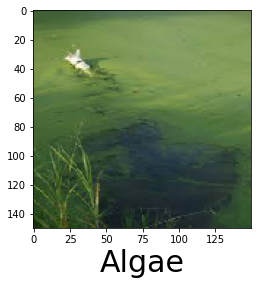

In [ ]:
# Testing model on predicting an image
img1 = image.load_img('/content/algae_data/test/algae/algae_1_test.jpg',target_size=(150,150))

plt.imshow(img1)

Y = image.img_to_array(img1)

# val is 1 if algae is detected; 0 if no algae is detected    
X = np.expand_dims(Y,axis=0)
val = model.predict(X)
print(val)
if val == 1: 
    plt.xlabel("Algae",fontsize=30)
elif val == 0:
    plt.xlabel("No Algae",fontsize=30)
    
plt.show()

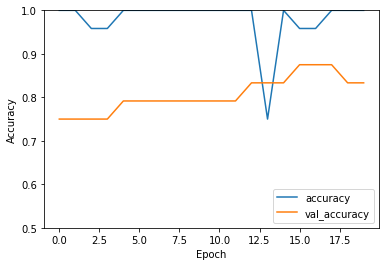

In [ ]:
# Graph of Epoch v. Accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')